In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from scipy.integrate import quad, trapezoid

import modules_py.functions as f
import modules_py.functions_vec as fv

pf = 1.52 # n0

# mpl.rcParams['figure.dpi'] = 300

plt.style.use('./publication23.mplstyle')
# plt.rc('text', usetex=True)
# plt.rc('font', family='sans')
# plt.rc('figure', dpi=300)
# plt.style.available

## Function definitions

$$
    \delta (\omega, k) = -\arctan \left( \frac{\Im D}{\Re D} \right)
$$

$$
    \frac{\partial \delta}{\partial \omega} = 
    \frac{\Re \frac{\partial D}{\partial \omega} \Im D
    - \Im \frac{\partial D}{\partial \omega} \Re D}
    {\left( \Re D \right) ^ 2 + \left( \Im D \right) ^ 2}
$$

$$
    D = \left(
    \omega ^ 2 - k ^ 2 - 1
    - \Pi_{\pi N N}^{(corr)}
    - \Pi_{\pi N \Delta}
    - i \varepsilon
    \right) ^ {-1}
$$

In [13]:
k0 = .5
W = np.r_[1e-9:15:1000j]
width = 1e-3

def delta_pnn_corr_pnd(k, w, pf):
    return -np.arctan(f.d_pnn_corr_pnd(k, w, pf, width=width).imag / \
        f.d_pnn_corr_pnd(k, w, pf, width=width).real)
delta_pnn_corr_pnd_vec = np.vectorize(delta_pnn_corr_pnd, excluded=['k', 'pf'])

def delta_pnn_corr(k, w, pf):
    return -np.arctan(f.d_pnn_corr(k, w, pf, width=width).imag / \
        f.d_pnn_corr(k, w, pf, width=width).real)
delta_pnn_corr_vec = np.vectorize(delta_pnn_corr, excluded=['k', 'pf'])


def d_pnn_corr_pnd_dw(k, w, pf):
    d_pnn_corr_pnd_tmp = f.d_pnn_corr_pnd(k, w, pf, width=width)
    
    return -d_pnn_corr_pnd_tmp ** 2 * (2 * w - \
        f.pi_pnn_corr_dw(k, w, pf) - f.pi_pnd_dw(k, w, pf))

def d_pnn_corr_dw(k, w, pf):
    d_pnn_corr_tmp = f.d_pnn_corr(k, w, pf, width=width)
    
    return -d_pnn_corr_tmp ** 2 * (2 * w - f.pi_pnn_corr_dw(k, w, pf))


def delta_pnn_corr_pnd_dw(k, w, pf):
    d_pnn_corr_pnd_tmp = f.d_pnn_corr_pnd(k, w, pf, width=width)
    d_pnn_corr_pnd_dw_tmp = d_pnn_corr_pnd_dw(k, w, pf)
    
    return (d_pnn_corr_pnd_dw_tmp.real * d_pnn_corr_pnd_tmp.imag - \
        d_pnn_corr_pnd_dw_tmp.imag * d_pnn_corr_pnd_tmp.real) / \
        (d_pnn_corr_pnd_tmp.real ** 2 + d_pnn_corr_pnd_tmp.imag ** 2)
delta_pnn_corr_pnd_dw_vec = np.vectorize(delta_pnn_corr_pnd_dw, excluded=['k', 'pf'])

def delta_pnn_corr_dw(k, w, pf):
    d_pnn_corr_tmp = f.d_pnn_corr(k, w, pf, width=width)
    d_pnn_corr_dw_tmp = d_pnn_corr_dw(k, w, pf)
    
    return (d_pnn_corr_dw_tmp.real * d_pnn_corr_tmp.imag - \
        d_pnn_corr_dw_tmp.imag * d_pnn_corr_tmp.real) / \
        (d_pnn_corr_tmp.real ** 2 + d_pnn_corr_tmp.imag ** 2)
delta_pnn_corr_dw_vec = np.vectorize(delta_pnn_corr_dw, excluded=['k', 'pf'])


d_pnn_corr_pnd_vec = np.vectorize(f.d_pnn_corr_pnd, excluded=['k', 'pf', 'width', 'part'])
d_pnn_corr_vec = np.vectorize(f.d_pnn_corr, excluded=['k', 'pf', 'width', 'part'])


delta_pnn_corr_pnd_arr = delta_pnn_corr_pnd_vec(k0, W, pf)
delta_pnn_corr_pnd_arr[delta_pnn_corr_pnd_arr < 0] += np.pi

delta_pnn_corr_arr = delta_pnn_corr_vec(k0, W, pf)
delta_pnn_corr_arr[delta_pnn_corr_arr < 0] += np.pi

## 1. General figures

### 1.1

- $\partial \delta / \partial \omega (\omega)$

- $\Im D (\omega)$

In [14]:
%matplotlib widget

# d delta / d omega
plt.subplot(211)
plt.plot(W, delta_pnn_corr_dw_vec(k0, W, pf))
plt.title(r'$n = %.1f n_0$, $k = %.1f$, width $= %.9f$' % 
    (2 * pf ** 3 / (3 * np.pi ** 2 * .47), k0, width))
plt.ylabel(r'$\partial \delta / \partial \omega$')

# Im D
plt.subplot(212)
plt.plot(W, d_pnn_corr_vec(k0, W, pf, width=width).imag)
plt.ylabel(r'$\Im D$')

plt.xlabel(r'$\omega$')
plt.show()
# plt.savefig('delta_and_d_together_%.2f_%.1f.png' % 
#     (pf, k0), dpi=300, format='PNG')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### 1.2 

- $\delta (\omega)$

In [17]:
%matplotlib widget

plt.plot(W, delta_pnn_corr_arr)
plt.title(r'$n = %.1f n_0$, $k = %.1f$' % (2 * pf ** 3 / (3 * np.pi ** 2 * .47), k0))
plt.ylabel(r'$\delta(\omega)$')
plt.xlabel(r'$\omega$')
plt.show()
# plt.savefig('delta_%.1f_%.1f.png' % (pf, k0), dpi=300, format='PNG')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## 2. Delta-Integral evaluation

$$
    \int_0^\infty \frac{\partial \delta}{\partial \omega}
    \left( \exp \frac{\omega}{T} - 1 \right) ^ {-1} d \omega
$$

- Вычислить:
$$
    \frac{1}{\pi} \int_0^\infty \delta
    \left( \exp \frac{\omega}{T} - 1 \right) ^ {-1} d \omega
$$

In [5]:
def weight(w, T):
    return 1 / (np.exp(w / T) - 1)
weight_vec = np.vectorize(weight, excluded=['T'])

def integrand(w, k, T, pf):
    return delta_pnn_corr_dw(k, w, pf) * weight(w, T)
integrand_vec = np.vectorize(integrand, excluded=['k', 'pf', 'T'])
T = .5

In [6]:
number_of_points = 50
K = np.r_[1e-9:4:number_of_points * 1j]

# int_trap = np.empty(number_of_points)
int_quad = np.empty(number_of_points)
err_quad = np.empty(number_of_points)

for i, k in enumerate(K):
    integrand_arr = integrand_vec(W, k, T, pf)
#     int_trap[i] = trapezoid(integrand_arr, W)
    int_quad[i], err_quad[i] = quad(integrand, -np.inf, np.inf, args=(k, T, pf))

<ipython-input-5-259243348d64>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(w / T) - 1)
<ipython-input-6-6a0961a304f5>:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int_quad[i], err_quad[i] = quad(integrand, -np.inf, np.inf, args=(k, T, pf))
<ipython-input-6-6a0961a304f5>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  int_quad[i], err_quad[i] = quad(integrand, -np.inf, np.inf, args=(k, T, pf))


In [7]:
%matplotlib widget

# plt.plot(K, int_trap, label='trapezoid')
plt.plot(K, int_quad, label=r'quadratic')
plt.plot(K, err_quad, label=r'quadratic_error')

plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [49]:
%matplotlib widget

k0 = 9

plt.subplot(311)
plt.title(r'$n = %.1f n_0$, $k = %.1f$, width $= %.9f$' % 
    (2 * pf ** 3 / (3 * np.pi ** 2 * .47), k0, width))

plt.plot(W, delta_pnn_corr_dw_vec(k0, W, pf))
plt.ylabel(r'$\partial \delta / \partial \omega$')
plt.xticks(color='w')

plt.subplot(312)
plt.plot(W, weight_vec(W, T))
plt.ylabel(r'$(\exp \frac{\omega}{T} - 1) ^ {-1}$')
plt.ylim(-1, 10)
plt.xticks(color='w')

plt.subplot(313)
plt.plot(W, integrand(W, k0, T, pf))
plt.ylabel('integrand')
plt.xlabel(r'$\omega$')

# plt.savefig('check_%.1f_%.1f.png' % (pf, k0), dpi=300, format='PNG')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## 3. Usual-Integral evaluation

$$
    (2 \pi) ^ 3 \frac{d N}{V d ^ 3 k} = \frac{2}{\pi} \int_0^\infty \omega \Im D
    (\exp \frac{\omega}{T} - 1) ^ {-1} d \omega
$$

In [13]:
width = 0
T0 = .5

def integrand_pnn_corr(w, k, T, pf):
    return 1 / (np.exp(w / T) - 1) * 2 / np.pi * w * \
        f.d_pnn_corr(k, w, pf, width=width).imag

def compare_free_integrand(w, k, T):
    return 1 / (np.exp(w / T) - 1) * 2 / np.pi * w * \
        f.d0(k, w).imag

def integrand_pnn_corr_pnd(w, k, T, pf):
    return 1 / (np.exp(w / T) - 1) * 2 / np.pi * w * \
        f.d_pnn_corr_pnd(k, w, pf, width=width).imag

def compare_free_no_integral(k, T):
    return 1 / (np.exp(f.w0(k) / T) - 1)
compare_free_no_integral_vec = np.vectorize(compare_free_no_integral, excluded=['T'])

In [14]:
number_of_points = 100
K = np.r_[1e-9:5:number_of_points * 1j]

integral_values_pnn_corr = np.empty(number_of_points)
error_values_pnn_corr = np.empty(number_of_points)

compare_integral_values_free = np.empty(number_of_points)
compare_error_values_free = np.empty(number_of_points)

for i, k in enumerate(K):
    integral_values_pnn_corr[i], error_values_pnn_corr[i] = \
        quad(integrand_pnn_corr, 1e-9, np.inf, args=(k, T0, pf))
    
    compare_integral_values_free[i], compare_error_values_free[i] = \
        quad(compare_free_integrand, 1e-9, np.inf, args=(k, T0))

<ipython-input-13-9caf85fe39a7>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(w / T) - 1) * 2 / np.pi * w * \


In [31]:
width = 1e-1

integral_values_pnn_corr_full = np.empty(number_of_points)

for i, k in enumerate(K):
    integral_values_pnn_corr_full[i], _ = quad(integrand_pnn_corr, 1e-9, np.inf, args=(k, T, pf))

<ipython-input-13-7ca8ea4320e5>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(w / T) - 1) * 2 / np.pi * w * \


In [4]:
def get_data_from_file(filename):
    data = np.genfromtxt(filename)
    if data.ndim == 1:
        return np.array([data[0]]), np.array([data[1:]])
    else:
        return data[:, 0], data[:, 1:]

import re
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [5]:
# Calculate sum here
import os

name_directory = 'graph_data/'
name_function = 'unity_eq_pnn_corr/'
name_pf = '1.520/'
name_folder_with_data = name_directory + name_function + name_pf
filenames = os.listdir(name_folder_with_data)
filenames.sort(key=natural_keys)

k_sum_values = np.array([])
sum_values = np.array([])

for filename in filenames:
    K_local, W_local = get_data_from_file(name_folder_with_data + filename)
    
    for i, k in enumerate(K_local):
        sum_value = 0
        
        for w in W_local[i, :]:
#             print(np.abs(f.d_pnn_corr(k, w, pf).imag))
#             if np.abs(f.d_pnn_corr(k, w, pf).imag) < 1e-2:
            sum_value += 2 * w / (2 * w - \
                f.pi_pnn_corr_dw(k, w, pf)) / (np.exp(w / T) - 1)

        sum_values = np.append(sum_values, sum_value)
        k_sum_values = np.append(k_sum_values, k)

sum_values_interpolated = np.interp(K, k_sum_values, sum_values)

/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


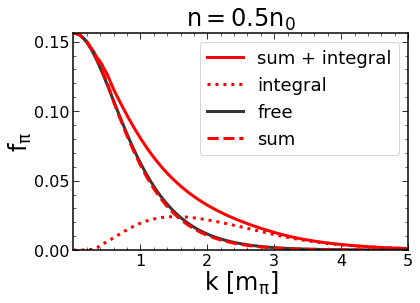

In [15]:
%matplotlib inline

# plt.plot(K, integral_values_pnn_corr_full, label='art. width = 0.1', color='green')

plt.plot(K, sum_values_interpolated + integral_values_pnn_corr, label='sum + integral', color='red')
plt.plot(K, integral_values_pnn_corr, label='integral', color='red', ls='dotted')
plt.plot(K, compare_free_no_integral_vec(K, T0), label='free', color='#363636')
plt.plot(k_sum_values, sum_values, label='sum', color='red', ls='dashed')

# plt.plot(K, compare_integral_values_free, label='free', color='#363636', ls='dotted')
# plt.plot(K, compare_free_no_integral_vec(K, T), color='#363636', ls='dashed')

plt.title(r'$n = %.1f n_0$' % f.n(pf))
plt.xlabel(r'$k$ $[m_\pi]$')
plt.ylabel(r'$f_\pi$')
plt.legend()

# plt.savefig('/Users/vladlen/sp/figures/thermodynamics/distribution_by_k_%.2f.pdf' % f.n(pf), dpi=300, format='PDF', bbox_inches='tight')
plt.show()

# Стоит показать эту картинку в начале диплома, чтобы продемонстрировать важность учёта мнимой части

## 4. Integral over $k$

We now have 
$
    f_\pi (k) = \int_0^\infty \frac{d \omega}{\pi}
    \frac{2 \omega \Im D (\omega, k)}{\exp \frac{\omega}{T} - 1}
$
.
Next step is to integrate 
$$
    n_\pi (T) = 3 \int_0^\infty \frac{k ^ 2 dk}{2 \pi ^ 2} f_\pi (k).
$$
Это число частиц в среде (как будто детектор в среде).


In [7]:
from scipy.integrate import dblquad

def integrand_t(w, k, t, pf):
    return 3 * k ** 2 / (2 * np.pi ** 2) / (np.exp(w / t) - 1) * 2 / np.pi * w * \
        f.d_pnn_corr(k, w, pf, width=1e-3).imag

number_of_points_t = 20
T = np.r_[1e-2:2:number_of_points_t * 1j]

integral_values_t = np.empty(number_of_points_t)

for i, t in enumerate(T):
    print(i)
    integral_values_t[i], _ = dblquad(integrand_t, 1e-9, np.inf, 1e-9, np.inf, args=(t, pf))

0


<ipython-input-7-9dc51cdc967d>:4: RuntimeWarning: overflow encountered in exp
  return 3 * k ** 2 / (2 * np.pi ** 2) / (np.exp(w / t) - 1) * 2 / np.pi * w * \


1


/Users/vladlen/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


2


/Users/vladlen/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


3
4


/Users/vladlen/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [10]:
from scipy.integrate import dblquad

number_of_points_t_ = 100

T_free = np.r_[1e-2:2:number_of_points_t_ * 1j]

def integrand_t_free(k, T):
    return 3 * k ** 2 / (2 * np.pi ** 2) * compare_free_no_integral(k, T)

integral_values_t_free = np.empty(number_of_points_t_)

for i, t in enumerate(T_free):
    integral_values_t_free[i], error = quad(integrand_t_free, 1e-9, np.inf, args=(t))

<ipython-input-2-08ea6cf992f9>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(f.w0(k) / T) - 1)


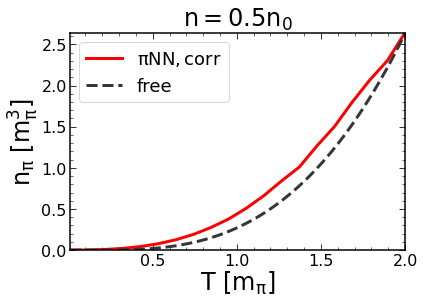

In [16]:
%matplotlib inline

plt.plot(T, integral_values_t, color='red', label=r'$\pi N N, corr$')
plt.plot(T_free, integral_values_t_free, color='#363636', label='free', ls='--')

plt.title(r'$n = %.1f n_0$' % f.n(pf))
plt.xlabel(r'$T$ $[m_\pi]$')
plt.ylabel(r'$n_\pi$ $[m_\pi ^ 3]$')
plt.legend()

# plt.savefig('/Users/vladlen/sp/figures/thermodynamics/distribution_total_%.2f.pdf' % f.n(pf), dpi=300, format='PDF', bbox_inches='tight')
plt.show()